# LSTM 

## Outline
1. [Imports](#imports)
2. [Data](#data)
3. [Model](#model)
5. [Train](#train)
6. [Predict](#predict)

<a name=imports></a>
## Imports

In [1]:
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

<a name=data></a>
## Data

### Ingestion 

In [2]:
# Get the path of the current working directory
curPath = os.getcwd()
# Appened the parent directory to the current path to step out of the current folder
parentDir = os.path.abspath(os.path.join(curPath, os.pardir))
print("Parent Directory", parentDir)
# Save the path to all of the datasets
india_cases_path = os.path.join(parentDir, "../cleaned_datasets/india/daily_cases_india.csv")
india_vacc_path = os.path.join(parentDir, "../cleaned_datasets/india/daily_vacc_india.csv")
usa_cases_path = os.path.join(parentDir, "../cleaned_datasets/usa/daily_cases_usa.csv")
usa_vacc_path = os.path.join(parentDir, "../cleaned_datasets/usa/vacc_usa.csv")

# Quick check to make sure the path exists
print("Path:", india_cases_path)
print("Exists:", os.path.exists(india_cases_path))

Parent Directory /Users/vish/College/Semester 5/Data Analytics/Project/covid19-prediction/models
Path: /Users/vish/College/Semester 5/Data Analytics/Project/covid19-prediction/models/../cleaned_datasets/india/daily_cases_india.csv
Exists: True


In [3]:
# Load the data as a pandas dataframe
india_cases_df = pd.read_csv(india_cases_path)
india_vacc_df =  pd.read_csv(india_vacc_path)

usa_cases_df = pd.read_csv(usa_cases_path)
usa_vacc_df = pd.read_csv(usa_vacc_path)

# Visualize the datasets
print('India Cases:\n',india_cases_df.head(),'\n')
print('India Vacc:\n',india_vacc_df.head(),'\n')

print('USA Cases:\n',usa_cases_df.head(),'\n')
print('USA Vacc:\n',usa_vacc_df.head(),'\n')

India Cases:
    Unnamed: 0        Date  Confirmed  Deaths  Recovered  Active
0           0  2020-01-30        1.0     0.0        0.0     0.0
1           1  2020-01-31        0.0     0.0        0.0     0.0
2           2  2020-02-01        0.0     0.0        0.0     0.0
3           3  2020-02-02        1.0     0.0        0.0     0.0
4           4  2020-02-03        1.0     0.0        0.0     0.0 

India Vacc:
    Updated On  Total_Doses  First_Dose  Second_Dose
0  2021-01-16          NaN         NaN          NaN
1  2021-01-17      20656.0     20656.0          0.0
2  2021-01-18      81690.0     81690.0          0.0
3  2021-01-19     192152.0    192152.0          0.0
4  2021-01-20     111510.0    111510.0          0.0 

USA Cases:
          Date  Confirmed  Deaths  Recovered
0  2020-04-14    26713.0  2305.0     6484.0
1  2020-04-15    29380.0  2478.0     6093.0
2  2020-04-16    31542.0  4616.0     5234.0
3  2020-04-17    32022.0  3879.0     5904.0
4  2020-04-18    32502.0  1859.0    13591

### Pre-Processing

### Multivariate

In [4]:
india_cases_multi_df = india_cases_df[["Date","Confirmed","Deaths","Recovered","Active"]]

### Univariate 

In [5]:
# Select only the Confirmed column for univariate analysis
# Selecting from the first index because the 0th index is NaN
india_cases_df = india_cases_df[["Confirmed"]][1:]
usa_cases_df = usa_cases_df[["Confirmed"]][1:]

# Visualize the datasets
print('India Cases:\n',india_cases_df.head(),'\n')
print('USA Cases:\n',usa_cases_df.head(),'\n')

India Cases:
    Confirmed
1        0.0
2        0.0
3        1.0
4        1.0
5        0.0 

USA Cases:
    Confirmed
1    29380.0
2    31542.0
3    32022.0
4    32502.0
5    26588.0 



In [6]:
# Normalize the data
india_cases_mean = india_cases_df.mean()
india_cases_std = india_cases_df.std()

usa_cases_mean = usa_cases_df.mean()
usa_cases_std = usa_cases_df.std()


india_cases_normalized_df = (india_cases_df-india_cases_mean)/india_cases_std
usa_cases_normalized_df = (usa_cases_df-usa_cases_mean)/usa_cases_std

# Visualize the datasets
print('India Cases:\n',india_cases_normalized_df.head(),'\n')
print('USA Cases:\n',usa_cases_normalized_df.head(),'\n')

India Cases:
    Confirmed
1  -0.687995
2  -0.687995
3  -0.687983
4  -0.687983
5  -0.687995 

USA Cases:
    Confirmed
1  -0.759976
2  -0.727837
3  -0.720702
4  -0.713566
5  -0.801480 



In [7]:
# Create train test splits
india_cases_train, india_cases_test = train_test_split(india_cases_normalized_df, test_size=0.2, shuffle=False)
india_vacc_train, india_vacc_test = train_test_split(india_vacc_df, test_size=0.2, shuffle=False)

usa_cases_train, usa_cases_test = train_test_split(usa_cases_normalized_df, test_size=0.2, shuffle=False)
usa_vacc_train, usa_vacc_test = train_test_split(usa_vacc_df, test_size=0.2, shuffle=False)

# Visualize splits
print('India Cases:\n',india_cases_train,'\n')
print('USA Cases:\n',usa_cases_train,'\n')

India Cases:
      Confirmed
1    -0.687995
2    -0.687995
3    -0.687983
4    -0.687983
5    -0.687995
..         ...
492   0.750239
493   0.576535
494   0.398886
495   0.475509
496   0.486403

[496 rows x 1 columns] 

USA Cases:
      Confirmed
1    -0.759976
2    -0.727837
3    -0.720702
4    -0.713566
5    -0.801480
..         ...
432  -1.130479
433  -1.022988
434  -1.037824
435  -1.003589
436  -0.992157

[436 rows x 1 columns] 



In [8]:
# Convert to numpy array
india_cases_train, india_cases_test = india_cases_train.to_numpy().flatten(), india_cases_test.to_numpy()
usa_cases_train, usa_cases_test = usa_cases_train.to_numpy().flatten(), usa_cases_test.to_numpy()

# Visualize outputs
print('India Cases:\n',india_cases_train,'\n')
print('USA Cases:\n',usa_cases_train,'\n')

India Cases:
 [-6.87995117e-01 -6.87995117e-01 -6.87982552e-01 -6.87982552e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01
 -6.87995117e-01 -6.87995117e-01 -6.87995117e-01 -6.87969986e-01
 -6.87995117e-01 -6.87706113e-01 -6.87969986e-01 -6.87982552e-01
 -6.87957421e-01 -6.87932290e-01 -6.87944855e-01 -6.87831767e-01
 -6.87919725e-01 -6.87856898e-01 -6.87882028e-01 -6.87743809e-01
 -6.87856898e-01 -6.87919725e-01 -6.87706113e-01 -6.87819202e-01
 -6.87517632e-01 -6.87366848e-01 -6.86914494e-01 -6.87165802e-01
 -6.86700882e-01 -6.87530198e-01 -6.86474705e-01 -6.87115540e-01
 -6.85984655e-01 -6.86738578e-01 -6.87530198e-01 -6.85142775e-01
 -6.8616057

In [9]:
# univariate data preparation
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [10]:
# choose a number of time steps
n_steps = 3
# split into samples
india_cases_train_X, india_cases_train_y = split_sequence(india_cases_train, n_steps)
india_cases_test_X, india_cases_test_y = split_sequence(india_cases_test, n_steps)
usa_cases_train_X, usa_cases_train_y = split_sequence(usa_cases_train, n_steps)
usa_cases_test_X, usa_cases_test_y = split_sequence(usa_cases_test, n_steps)

# summarize the data
for i in range(0,5):
    print(india_cases_train_X[i], india_cases_train_y[i])
print()
# summarize the data
for i in range(0,5):
    print(usa_cases_train_X[i], usa_cases_train_y[i])

[-0.68799512 -0.68799512 -0.68798255] -0.6879825515499531
[-0.68799512 -0.68798255 -0.68798255] -0.6879951169346213
[-0.68798255 -0.68798255 -0.68799512] -0.6879951169346213
[-0.68798255 -0.68799512 -0.68799512] -0.6879951169346213
[-0.68799512 -0.68799512 -0.68799512] -0.6879951169346213

[-0.75997589 -0.72783707 -0.72070172] -0.7135663621434899
[-0.72783707 -0.72070172 -0.71356636] -0.8014798602697644
[-0.72070172 -0.71356636 -0.80147986] -0.8206709874393653
[-0.71356636 -0.80147986 -0.82067099] -0.7796129756326744
[-0.80147986 -0.82067099 -0.77961298] -0.7701734979001441


In [11]:
# Reshape the data into [samples, timesteps, features]
# univariate
n_features = 1

india_cases_train_X = india_cases_train_X.reshape((india_cases_train_X.shape[0], 
                                                   india_cases_train_X.shape[1], n_features))
india_cases_test_X = india_cases_test_X.reshape((india_cases_test_X.shape[0], 
                                                 india_cases_test_X.shape[1], n_features))

usa_cases_train_X = usa_cases_train_X.reshape((usa_cases_train_X.shape[0], 
                                                   usa_cases_train_X.shape[1], n_features))
usa_cases_test_X = usa_cases_test_X.reshape((usa_cases_test_X.shape[0], 
                                                   usa_cases_test_X.shape[1], n_features))

# Visualize outputs
print('India Cases:\n',india_cases_train_X,'\n')
print('USA Cases:\n',usa_cases_train_X,'\n')

India Cases:
 [[[-0.68799512]
  [-0.68799512]
  [-0.68798255]]

 [[-0.68799512]
  [-0.68798255]
  [-0.68798255]]

 [[-0.68798255]
  [-0.68798255]
  [-0.68799512]]

 ...

 [[ 0.82649813]
  [ 0.75023881]
  [ 0.57653493]]

 [[ 0.75023881]
  [ 0.57653493]
  [ 0.39888553]]

 [[ 0.57653493]
  [ 0.39888553]
  [ 0.47550924]]] 

USA Cases:
 [[[-0.75997589]
  [-0.72783707]
  [-0.72070172]]

 [[-0.72783707]
  [-0.72070172]
  [-0.71356636]]

 [[-0.72070172]
  [-0.71356636]
  [-0.80147986]]

 ...

 [[-1.07058673]
  [-1.13047911]
  [-1.02298798]]

 [[-1.13047911]
  [-1.02298798]
  [-1.03782357]]

 [[-1.02298798]
  [-1.03782357]
  [-1.00358874]]] 



<a name=model></a>
## Model 

In [12]:
# Imports for model components
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import MeanAbsolutePercentageError, MeanAbsoluteError
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

### Univariate non-stacked -- Rolling

In [13]:
# Define the model
def build_univariate_non_stacked(optimizer="adam", lstm_nparams=100, n_steps=3, n_features=1):
    model_uni = Sequential()
    model_uni.add(LSTM(lstm_nparams, activation='relu', input_shape=(n_steps, n_features)))
    model_uni.add(Dense(1))
    model_uni.compile(optimizer=optimizer,loss='mae', metrics=["mae"])
    model_uni.summary()
    return model_uni

### Univariate non-stacked -- Long-Term

In [14]:
# Define the model
def build_univariate_non_stacked_long(optimizer="adam", lstm_nparams=100, n_steps=3, n_features=1):
    model_uni = Sequential()
    model_uni.add(LSTM(lstm_nparams, activation='relu', input_shape=(n_steps, n_features)))
    model_uni.add(Dense(10))
    model_uni.compile(optimizer=optimizer,loss='mae', metrics=["mae"])
    model_uni.summary()
    return model_uni

#### Grid Search

In [15]:
# Using KerasClassifier wrapper 
keras_estimator = KerasRegressor(build_fn=build_univariate_non_stacked, verbose=1)

<ipython-input-15-cb11a1e1de68>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_estimator = KerasRegressor(build_fn=build_univariate_non_stacked, verbose=1)


In [16]:
# Defining parameters for the gridserach
param_grid = {
#     'epochs': [10,100,300,],
    'lstm_nparams':[15,50],
#     'n_steps': [3, 6, 15],
#     'optimizer': ['RMSprop','Adam','Adamax','sgd']
}

kfold_splits = 5

In [17]:
# Defining GridSearch
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=-1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid,
#                     scoring="neg_mean_absolute_error",
)

In [ ]:
# Fitting GridSearch
grid_result = grid.fit(india_cases_train_X, india_cases_train_y, )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Writing the gridsearch results to file
file1 = open("univariate_non_stacked_india.txt", "w")
file1.write("mean,stdev,pram")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    file1.write("%f,%f,%r" % (mean, stdev, param))
    file1.write("\n")
file1.close()

In [ ]:
sorted(grid_result.cv_results_.keys())

In [ ]:
grid_result.cv_results_['split2_train_score']

### Univariate stacked -- Rolling

In [23]:
# Define the model
def build_univariate_stacked(optimizer="adam",lstm_nparams_l1=100, lstm_nparams_l2=150, n_steps=3, n_features=1):
    model_uni_stacked = Sequential()
    model_uni_stacked.add(LSTM(lstm_nparams_l1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model_uni_stacked.add(LSTM(lstm_nparams_l2, activation='relu'))
    model_uni_stacked.add(Dense(1))
    model_uni_stacked.compile(optimizer=optimizer,loss='mae')
    model_uni_stacked.summary()
    return model_uni_stacked

### Univariate stacked -- Long-Term

In [24]:
# Define the model
def build_univariate_stacked_long(optimizer="adam",lstm_nparams_l1=100, lstm_nparams_l2=150, n_steps=3, n_features=1):
    model_uni_stacked = Sequential()
    model_uni_stacked.add(LSTM(lstm_nparams_l1, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model_uni_stacked.add(LSTM(lstm_nparams_l2, activation='relu'))
    model_uni_stacked.add(Dense(10))
    model_uni_stacked.compile(optimizer=optimizer,loss='mae')
    model_uni_stacked.summary()
    return model_uni_stacked

#### Grid Search

In [25]:
# Using KerasClassifier wrapper 
keras_estimator = KerasRegressor(build_fn=build_univariate_stacked, verbose=1)

<ipython-input-25-9579a4b1c571>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_estimator = KerasRegressor(build_fn=build_univariate_stacked, verbose=1)


In [26]:
# Defining parameters for the gridserach
param_grid = {
    'epochs': [10,100,300,],
    'lstm_nparams_l1':[15,50,100,150],
    'lstm_nparams_l2':[15,50,100,150],
    'n_steps': [3, 6, 15],
#     'optimizer': ['RMSprop','Adam','Adamax','sgd']
}

kfold_splits = 5

In [27]:
# Defining GridSearch
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=-1,
                    return_train_score=True,
                    cv=kfold_splits,
                    param_grid=param_grid,
                    scoring="neg_mean_absolute_error",
)

In [ ]:
# Fitting GridSearch
grid_result = grid.fit(india_cases_train_X, india_cases_train_y, )

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Writing the gridsearch results to file
file1 = open("univariate_stacked_india.txt", "w")
file1.write("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
file1.write("\n")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    file1.write("%f (%f) with: %r" % (mean, stdev, param))
    file1.write("\n")
file1.close()

## Multivariate 

In [30]:
# Define the model
model_uni = Sequential()
model_uni.add(LSTM(150, activation='relu', input_shape=(n_steps, n_features)))
model_uni.add(Dense(1))
model_uni.compile(optimizer='adam',loss='mae')
model_uni.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150)               91200     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


<a name=train></a>
## Train 

In [31]:
# Tensorboard callback
logdir = os.path.join(parentDir+"/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [32]:
def train_models(model,train_X,train_y,test_X,test_y):
    model.fit(train_X,train_y,
              validation_data=(test_X,test_y),
              epochs=300,
              callbacks=[tensorboard_callback])
    return model
#     model.save(save_name)

In [33]:
# Define all of the LSTM models
model_uni_non_stacked_india = build_univariate_non_stacked()
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_long_india = build_univariate_non_stacked_long()
model_uni_non_stacked_long_usa = build_univariate_non_stacked_long()
model_uni_stacked_india = build_univariate_stacked()
model_uni_stacked_usa = build_univariate_stacked()
model_uni_stacked_long_india = build_univariate_stacked_long()
model_uni_stacked_long_usa = build_univariate_stacked()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100)               40800     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainab

In [34]:
models_india = [model_uni_non_stacked_india,model_uni_non_stacked_long_india,model_uni_stacked_india ,model_uni_stacked_long_india]
models_usa = [model_uni_non_stacked_usa,model_uni_non_stacked_long_usa,model_uni_stacked_usa ,model_uni_stacked_long_usa]

In [35]:
models_india_trained = []
for m in models_india:
    models_india_trained.append(train_models(m,india_cases_train_X,india_cases_train_y,india_cases_test_X,india_cases_test_y))

Epoch 1/300
16/16 [==============================] - 2s 17ms/step - loss: 0.6182 - mae: 0.6182 - val_loss: 0.1453 - val_mae: 0.1453
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 0.4368 - mae: 0.4368 - val_loss: 0.0800 - val_mae: 0.0800
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.1854 - mae: 0.1854 - val_loss: 0.0767 - val_mae: 0.0767
Epoch 4/300
16/16 [==============================] - 0s 6ms/step - loss: 0.1065 - mae: 0.1065 - val_loss: 0.0730 - val_mae: 0.0730
Epoch 5/300
16/16 [==============================] - 0s 6ms/step - loss: 0.1027 - mae: 0.1027 - val_loss: 0.0765 - val_mae: 0.0765
Epoch 6/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0915 - mae: 0.0915 - val_loss: 0.0735 - val_mae: 0.0735
Epoch 7/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0905 - mae: 0.0905 - val_loss: 0.0748 - val_mae: 0.0748
Epoch 8/300
16/16 [==============================] - 0s 7ms/step - loss: 0.0918 - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.0670 - val_loss: 0.0686 - val_mae: 0.0686
Epoch 64/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0672 - mae: 0.0672 - val_loss: 0.0675 - val_mae: 0.0675
Epoch 65/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0680 - mae: 0.0680 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 66/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0696 - mae: 0.0696 - val_loss: 0.0633 - val_mae: 0.0633
Epoch 67/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0768 - mae: 0.0768 - val_loss: 0.0696 - val_mae: 0.0696
Epoch 68/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0686 - mae: 0.0686 - val_loss: 0.0684 - val_mae: 0.0684
Epoch 69/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0738 - mae: 0.0738 - val_loss: 0.0634 - val_mae: 0.0634
Epoch 70/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0

Epoch 125/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0676 - mae: 0.0676 - val_loss: 0.0656 - val_mae: 0.0656
Epoch 126/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0700 - mae: 0.0700 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 127/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0654 - mae: 0.0654 - val_loss: 0.0658 - val_mae: 0.0658
Epoch 128/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0675 - mae: 0.0675 - val_loss: 0.0647 - val_mae: 0.0647
Epoch 129/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0667 - mae: 0.0667 - val_loss: 0.0694 - val_mae: 0.0694
Epoch 130/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0659 - mae: 0.0659 - val_loss: 0.0642 - val_mae: 0.0642
Epoch 131/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0674 - mae: 0.0674 - val_loss: 0.0687 - val_mae: 0.0687
Epoch 132/300
16/16 [==============================] - 0s 6ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0651 - mae: 0.0651 - val_loss: 0.0658 - val_mae: 0.0658
Epoch 187/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0643 - mae: 0.0643 - val_loss: 0.0653 - val_mae: 0.0653
Epoch 188/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0638 - mae: 0.0638 - val_loss: 0.0661 - val_mae: 0.0661
Epoch 189/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0661 - mae: 0.0661 - val_loss: 0.0628 - val_mae: 0.0628
Epoch 190/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0670 - mae: 0.0670 - val_loss: 0.0687 - val_mae: 0.0687
Epoch 191/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0704 - mae: 0.0704 - val_loss: 0.0672 - val_mae: 0.0672
Epoch 192/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0630 - mae: 0.0630 - val_loss: 0.0628 - val_mae: 0.0628
Epoch 193/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0688 -

Epoch 248/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0649 - mae: 0.0649 - val_loss: 0.0581 - val_mae: 0.0581
Epoch 249/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0651 - mae: 0.0651 - val_loss: 0.0718 - val_mae: 0.0718
Epoch 250/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0725 - mae: 0.0725 - val_loss: 0.0595 - val_mae: 0.0595
Epoch 251/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0650 - mae: 0.0650 - val_loss: 0.0641 - val_mae: 0.0641
Epoch 252/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0692 - mae: 0.0692 - val_loss: 0.0643 - val_mae: 0.0643
Epoch 253/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0621 - mae: 0.0621 - val_loss: 0.0633 - val_mae: 0.0633
Epoch 254/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0614 - mae: 0.0614 - val_loss: 0.0602 - val_mae: 0.0602
Epoch 255/300
16/16 [==============================] - 0s 6ms/step - 

Epoch 10/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0960 - mae: 0.0960 - val_loss: 0.0753 - val_mae: 0.0753
Epoch 11/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0948 - mae: 0.0948 - val_loss: 0.0757 - val_mae: 0.0757
Epoch 12/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0941 - mae: 0.0941 - val_loss: 0.0705 - val_mae: 0.0705
Epoch 13/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0956 - mae: 0.0956 - val_loss: 0.0757 - val_mae: 0.0757
Epoch 14/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0909 - mae: 0.0909 - val_loss: 0.0700 - val_mae: 0.0700
Epoch 15/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0921 - mae: 0.0921 - val_loss: 0.0708 - val_mae: 0.0708
Epoch 16/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0895 - mae: 0.0895 - val_loss: 0.0722 - val_mae: 0.0722
Epoch 17/300
16/16 [==============================] - 0s 5ms/step - loss: 0.

16/16 [==============================] - 0s 5ms/step - loss: 0.0716 - mae: 0.0716 - val_loss: 0.0689 - val_mae: 0.0689
Epoch 73/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0698 - mae: 0.0698 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 74/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0696 - mae: 0.0696 - val_loss: 0.0667 - val_mae: 0.0667
Epoch 75/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0714 - mae: 0.0714 - val_loss: 0.0679 - val_mae: 0.0679
Epoch 76/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0688 - mae: 0.0688 - val_loss: 0.0650 - val_mae: 0.0650
Epoch 77/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0692 - mae: 0.0692 - val_loss: 0.0686 - val_mae: 0.0686
Epoch 78/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0706 - mae: 0.0706 - val_loss: 0.0665 - val_mae: 0.0665
Epoch 79/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0705 - mae: 0

Epoch 134/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0685 - mae: 0.0685 - val_loss: 0.0675 - val_mae: 0.0675
Epoch 135/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0662 - mae: 0.0662 - val_loss: 0.0670 - val_mae: 0.0670
Epoch 136/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0681 - mae: 0.0681 - val_loss: 0.0633 - val_mae: 0.0633
Epoch 137/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0702 - mae: 0.0702 - val_loss: 0.0665 - val_mae: 0.0665
Epoch 138/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0659 - mae: 0.0659 - val_loss: 0.0662 - val_mae: 0.0662
Epoch 139/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0656 - mae: 0.0656 - val_loss: 0.0635 - val_mae: 0.0635
Epoch 140/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0679 - mae: 0.0679 - val_loss: 0.0639 - val_mae: 0.0639
Epoch 141/300
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 6ms/step - loss: 0.0665 - mae: 0.0665 - val_loss: 0.0675 - val_mae: 0.0675
Epoch 196/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0701 - mae: 0.0701 - val_loss: 0.0715 - val_mae: 0.0715
Epoch 197/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0682 - mae: 0.0682 - val_loss: 0.0679 - val_mae: 0.0679
Epoch 198/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0665 - mae: 0.0665 - val_loss: 0.0631 - val_mae: 0.0631
Epoch 199/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0677 - mae: 0.0677 - val_loss: 0.0704 - val_mae: 0.0704
Epoch 200/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0677 - mae: 0.0677 - val_loss: 0.0693 - val_mae: 0.0693
Epoch 201/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0699 - mae: 0.0699 - val_loss: 0.0674 - val_mae: 0.0674
Epoch 202/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0655 -

Epoch 257/300
16/16 [==============================] - 0s 7ms/step - loss: 0.0662 - mae: 0.0662 - val_loss: 0.0621 - val_mae: 0.0621
Epoch 258/300
16/16 [==============================] - 0s 7ms/step - loss: 0.0681 - mae: 0.0681 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 259/300
16/16 [==============================] - 0s 8ms/step - loss: 0.0661 - mae: 0.0661 - val_loss: 0.0672 - val_mae: 0.0672
Epoch 260/300
16/16 [==============================] - 0s 7ms/step - loss: 0.0636 - mae: 0.0636 - val_loss: 0.0654 - val_mae: 0.0654
Epoch 261/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0650 - mae: 0.0650 - val_loss: 0.0662 - val_mae: 0.0662
Epoch 262/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0664 - mae: 0.0664 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 263/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0648 - mae: 0.0648 - val_loss: 0.0658 - val_mae: 0.0658
Epoch 264/300
16/16 [==============================] - 0s 7ms/step - 

16/16 [==============================] - 0s 10ms/step - loss: 0.0738 - val_loss: 0.0723
Epoch 25/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0722 - val_loss: 0.0663
Epoch 26/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0740 - val_loss: 0.0672
Epoch 27/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0758 - val_loss: 0.0655
Epoch 28/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0730 - val_loss: 0.0671
Epoch 29/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0716 - val_loss: 0.0666
Epoch 30/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0713 - val_loss: 0.0684
Epoch 31/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0749 - val_loss: 0.0715
Epoch 32/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0760 - val_loss: 0.0691
Epoch 33/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0711 - val_loss: 0.0683
Epoch 

16/16 [==============================] - 0s 10ms/step - loss: 0.0667 - val_loss: 0.0660
Epoch 106/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0677 - val_loss: 0.0674
Epoch 107/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0666 - val_loss: 0.0718
Epoch 108/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0739 - val_loss: 0.0619
Epoch 109/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0708 - val_loss: 0.0666
Epoch 110/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0681 - val_loss: 0.0670
Epoch 111/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0699 - val_loss: 0.0660
Epoch 112/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0686 - val_loss: 0.0617
Epoch 113/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0685 - val_loss: 0.0650
Epoch 114/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0665 - val_loss: 0.0

16/16 [==============================] - 0s 9ms/step - loss: 0.0622 - val_loss: 0.0647
Epoch 186/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0654 - val_loss: 0.0683
Epoch 187/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0670 - val_loss: 0.0651
Epoch 188/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0641 - val_loss: 0.0624
Epoch 189/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0649 - val_loss: 0.0641
Epoch 190/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0655 - val_loss: 0.0629
Epoch 191/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0687 - val_loss: 0.0584
Epoch 192/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0656 - val_loss: 0.0626
Epoch 193/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0623 - val_loss: 0.0621
Epoch 194/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0613 - val_loss: 0.06

16/16 [==============================] - 0s 10ms/step - loss: 0.0609 - val_loss: 0.0587
Epoch 266/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0625 - val_loss: 0.0625
Epoch 267/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0589 - val_loss: 0.0614
Epoch 268/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0594 - val_loss: 0.0588
Epoch 269/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0592 - val_loss: 0.0606
Epoch 270/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0605 - val_loss: 0.0600
Epoch 271/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0595 - val_loss: 0.0595
Epoch 272/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0581 - val_loss: 0.0610
Epoch 273/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0598 - val_loss: 0.0583
Epoch 274/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0594 - val_loss: 0.0618
E

16/16 [==============================] - 0s 12ms/step - loss: 0.0825 - val_loss: 0.0739
Epoch 47/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0843 - val_loss: 0.0676
Epoch 48/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0721 - val_loss: 0.0745
Epoch 49/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0750 - val_loss: 0.0794
Epoch 50/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0806 - val_loss: 0.0638
Epoch 51/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0807 - val_loss: 0.0732
Epoch 52/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0702 - val_loss: 0.0709
Epoch 53/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0743 - val_loss: 0.0740
Epoch 54/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0778 - val_loss: 0.0669
Epoch 55/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0704 - val_loss: 0.0737
Epoc

16/16 [==============================] - 0s 9ms/step - loss: 0.0687 - val_loss: 0.0683
Epoch 128/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0681 - val_loss: 0.0677
Epoch 129/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0661 - val_loss: 0.0684
Epoch 130/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0659 - val_loss: 0.0694
Epoch 131/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0659 - val_loss: 0.0675
Epoch 132/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0670 - val_loss: 0.0659
Epoch 133/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0681 - val_loss: 0.0735
Epoch 134/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0710 - val_loss: 0.0717
Epoch 135/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0743 - val_loss: 0.0723
Epoch 136/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0936 - val_loss: 0.064

Epoch 208/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0693 - val_loss: 0.0694
Epoch 209/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0756 - val_loss: 0.0811
Epoch 210/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0742 - val_loss: 0.0657
Epoch 211/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0683 - val_loss: 0.0619
Epoch 212/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0746 - val_loss: 0.0658
Epoch 213/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0655 - val_loss: 0.0662
Epoch 214/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0668 - val_loss: 0.0655
Epoch 215/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0651 - val_loss: 0.0651
Epoch 216/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0682 - val_loss: 0.0695
Epoch 217/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0692 - val_los

Epoch 289/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0648 - val_loss: 0.0669
Epoch 290/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0728 - val_loss: 0.0605
Epoch 291/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0673 - val_loss: 0.0658
Epoch 292/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0669 - val_loss: 0.0635
Epoch 293/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0655 - val_loss: 0.0658
Epoch 294/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0629 - val_loss: 0.0645
Epoch 295/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0672 - val_loss: 0.0683
Epoch 296/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0670 - val_loss: 0.0634
Epoch 297/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0628 - val_loss: 0.0629
Epoch 298/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0649 - v

In [36]:
for m in models_usa:
    train_models(m,usa_cases_train_X,usa_cases_train_y,usa_cases_test_X,usa_cases_test_y)

Epoch 1/300
14/14 [==============================] - 1s 22ms/step - loss: 0.7295 - mae: 0.7295 - val_loss: 0.9311 - val_mae: 0.9311
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.6217 - mae: 0.6217 - val_loss: 0.8960 - val_mae: 0.8960
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.4962 - mae: 0.4962 - val_loss: 0.8455 - val_mae: 0.8455
Epoch 4/300
14/14 [==============================] - 0s 6ms/step - loss: 0.3175 - mae: 0.3175 - val_loss: 0.8217 - val_mae: 0.8217
Epoch 5/300
14/14 [==============================] - 0s 5ms/step - loss: 0.2104 - mae: 0.2104 - val_loss: 0.8257 - val_mae: 0.8257
Epoch 6/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1983 - mae: 0.1983 - val_loss: 0.7963 - val_mae: 0.7963
Epoch 7/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1849 - mae: 0.1849 - val_loss: 0.7774 - val_mae: 0.7774
Epoch 8/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1816 - 

14/14 [==============================] - 0s 6ms/step - loss: 0.1534 - mae: 0.1534 - val_loss: 0.7843 - val_mae: 0.7843
Epoch 64/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1557 - mae: 0.1557 - val_loss: 0.7865 - val_mae: 0.7865
Epoch 65/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1534 - mae: 0.1534 - val_loss: 0.7850 - val_mae: 0.7850
Epoch 66/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1506 - mae: 0.1506 - val_loss: 0.7845 - val_mae: 0.7845
Epoch 67/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1530 - mae: 0.1530 - val_loss: 0.7839 - val_mae: 0.7839
Epoch 68/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1522 - mae: 0.1522 - val_loss: 0.7879 - val_mae: 0.7879
Epoch 69/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1526 - mae: 0.1526 - val_loss: 0.7808 - val_mae: 0.7808
Epoch 70/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1498 - mae: 0

Epoch 125/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1404 - mae: 0.1404 - val_loss: 0.7881 - val_mae: 0.7881
Epoch 126/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1420 - mae: 0.1420 - val_loss: 0.7950 - val_mae: 0.7950
Epoch 127/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1443 - mae: 0.1443 - val_loss: 0.7869 - val_mae: 0.7869
Epoch 128/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1401 - mae: 0.1401 - val_loss: 0.7983 - val_mae: 0.7983
Epoch 129/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1434 - mae: 0.1434 - val_loss: 0.7873 - val_mae: 0.7873
Epoch 130/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1441 - mae: 0.1441 - val_loss: 0.7968 - val_mae: 0.7968
Epoch 131/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1457 - mae: 0.1457 - val_loss: 0.7930 - val_mae: 0.7930
Epoch 132/300
14/14 [==============================] - 0s 8ms/step - 

14/14 [==============================] - 0s 6ms/step - loss: 0.1379 - mae: 0.1379 - val_loss: 0.8159 - val_mae: 0.8159
Epoch 187/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1358 - mae: 0.1358 - val_loss: 0.8098 - val_mae: 0.8098
Epoch 188/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1339 - mae: 0.1339 - val_loss: 0.8245 - val_mae: 0.8245
Epoch 189/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1373 - mae: 0.1373 - val_loss: 0.8165 - val_mae: 0.8165
Epoch 190/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1397 - mae: 0.1397 - val_loss: 0.8098 - val_mae: 0.8098
Epoch 191/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1376 - mae: 0.1376 - val_loss: 0.8076 - val_mae: 0.8076
Epoch 192/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1355 - mae: 0.1355 - val_loss: 0.8056 - val_mae: 0.8056
Epoch 193/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1374 -

Epoch 248/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1276 - mae: 0.1276 - val_loss: 0.8033 - val_mae: 0.8033
Epoch 249/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1258 - mae: 0.1258 - val_loss: 0.8117 - val_mae: 0.8117
Epoch 250/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1262 - mae: 0.1262 - val_loss: 0.8072 - val_mae: 0.8072
Epoch 251/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1270 - mae: 0.1270 - val_loss: 0.8004 - val_mae: 0.8004
Epoch 252/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1267 - mae: 0.1267 - val_loss: 0.8051 - val_mae: 0.8051
Epoch 253/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1270 - mae: 0.1270 - val_loss: 0.8003 - val_mae: 0.8003
Epoch 254/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1257 - mae: 0.1257 - val_loss: 0.8036 - val_mae: 0.8036
Epoch 255/300
14/14 [==============================] - 0s 5ms/step - 

Epoch 10/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1860 - mae: 0.1860 - val_loss: 0.7916 - val_mae: 0.7916
Epoch 11/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1833 - mae: 0.1833 - val_loss: 0.7894 - val_mae: 0.7894
Epoch 12/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1833 - mae: 0.1833 - val_loss: 0.7898 - val_mae: 0.7898
Epoch 13/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1826 - mae: 0.1826 - val_loss: 0.7947 - val_mae: 0.7947
Epoch 14/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1790 - mae: 0.1790 - val_loss: 0.7945 - val_mae: 0.7945
Epoch 15/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1784 - mae: 0.1784 - val_loss: 0.7993 - val_mae: 0.7993
Epoch 16/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1768 - mae: 0.1768 - val_loss: 0.7974 - val_mae: 0.7974
Epoch 17/300
14/14 [==============================] - 0s 5ms/step - loss: 0.

14/14 [==============================] - 0s 6ms/step - loss: 0.1529 - mae: 0.1529 - val_loss: 0.8132 - val_mae: 0.8132
Epoch 73/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1507 - mae: 0.1507 - val_loss: 0.8085 - val_mae: 0.8085
Epoch 74/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1501 - mae: 0.1501 - val_loss: 0.8143 - val_mae: 0.8143
Epoch 75/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1510 - mae: 0.1510 - val_loss: 0.8102 - val_mae: 0.8102
Epoch 76/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1519 - mae: 0.1519 - val_loss: 0.8137 - val_mae: 0.8137
Epoch 77/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1520 - mae: 0.1520 - val_loss: 0.8141 - val_mae: 0.8141
Epoch 78/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1513 - mae: 0.1513 - val_loss: 0.8167 - val_mae: 0.8167
Epoch 79/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1495 - mae: 0

Epoch 134/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1443 - mae: 0.1443 - val_loss: 0.8201 - val_mae: 0.8201
Epoch 135/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1482 - mae: 0.1482 - val_loss: 0.8185 - val_mae: 0.8185
Epoch 136/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1488 - mae: 0.1488 - val_loss: 0.8127 - val_mae: 0.8127
Epoch 137/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1443 - mae: 0.1443 - val_loss: 0.8184 - val_mae: 0.8184
Epoch 138/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1455 - mae: 0.1455 - val_loss: 0.8241 - val_mae: 0.8241
Epoch 139/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1457 - mae: 0.1457 - val_loss: 0.8161 - val_mae: 0.8161
Epoch 140/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1453 - mae: 0.1453 - val_loss: 0.8249 - val_mae: 0.8249
Epoch 141/300
14/14 [==============================] - 0s 6ms/step - 

14/14 [==============================] - 0s 6ms/step - loss: 0.1373 - mae: 0.1373 - val_loss: 0.8287 - val_mae: 0.8287
Epoch 196/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1361 - mae: 0.1361 - val_loss: 0.8389 - val_mae: 0.8389
Epoch 197/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1363 - mae: 0.1363 - val_loss: 0.8433 - val_mae: 0.8433
Epoch 198/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1375 - mae: 0.1375 - val_loss: 0.8361 - val_mae: 0.8361
Epoch 199/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1395 - mae: 0.1395 - val_loss: 0.8358 - val_mae: 0.8358
Epoch 200/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1399 - mae: 0.1399 - val_loss: 0.8420 - val_mae: 0.8420
Epoch 201/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1382 - mae: 0.1382 - val_loss: 0.8387 - val_mae: 0.8387
Epoch 202/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1373 -

Epoch 257/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1321 - mae: 0.1321 - val_loss: 0.8042 - val_mae: 0.8042
Epoch 258/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1348 - mae: 0.1348 - val_loss: 0.8059 - val_mae: 0.8059
Epoch 259/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1344 - mae: 0.1344 - val_loss: 0.8144 - val_mae: 0.8144
Epoch 260/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1332 - mae: 0.1332 - val_loss: 0.8047 - val_mae: 0.8047
Epoch 261/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1314 - mae: 0.1314 - val_loss: 0.8065 - val_mae: 0.8065
Epoch 262/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1348 - mae: 0.1348 - val_loss: 0.8041 - val_mae: 0.8041
Epoch 263/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1320 - mae: 0.1320 - val_loss: 0.7986 - val_mae: 0.7986
Epoch 264/300
14/14 [==============================] - 0s 5ms/step - 

14/14 [==============================] - 0s 10ms/step - loss: 0.1726 - val_loss: 0.7849
Epoch 25/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1661 - val_loss: 0.7824
Epoch 26/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1714 - val_loss: 0.7994
Epoch 27/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1648 - val_loss: 0.7891
Epoch 28/300
14/14 [==============================] - 0s 14ms/step - loss: 0.1685 - val_loss: 0.7898
Epoch 29/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1728 - val_loss: 0.7741
Epoch 30/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1620 - val_loss: 0.7671
Epoch 31/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1602 - val_loss: 0.7816
Epoch 32/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1629 - val_loss: 0.7849
Epoch 33/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1682 - val_loss: 0.7845
Epoc

14/14 [==============================] - 0s 11ms/step - loss: 0.1414 - val_loss: 0.7657
Epoch 106/300
14/14 [==============================] - 0s 12ms/step - loss: 0.1431 - val_loss: 0.7687
Epoch 107/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1425 - val_loss: 0.7698
Epoch 108/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1409 - val_loss: 0.7594
Epoch 109/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1438 - val_loss: 0.7736
Epoch 110/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1415 - val_loss: 0.7694
Epoch 111/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1382 - val_loss: 0.7709
Epoch 112/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1387 - val_loss: 0.7714
Epoch 113/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1405 - val_loss: 0.7697
Epoch 114/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1381 - val_loss: 0

14/14 [==============================] - 0s 10ms/step - loss: 0.1271 - val_loss: 0.8120
Epoch 186/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1327 - val_loss: 0.8064
Epoch 187/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1311 - val_loss: 0.7896
Epoch 188/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1326 - val_loss: 0.8027
Epoch 189/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1291 - val_loss: 0.8128
Epoch 190/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1280 - val_loss: 0.7874
Epoch 191/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1331 - val_loss: 0.8055
Epoch 192/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1260 - val_loss: 0.8073
Epoch 193/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1322 - val_loss: 0.8028
Epoch 194/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1328 - val_loss: 0

14/14 [==============================] - 0s 10ms/step - loss: 0.1180 - val_loss: 0.8378
Epoch 266/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1198 - val_loss: 0.8463
Epoch 267/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1258 - val_loss: 0.8437
Epoch 268/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1243 - val_loss: 0.8430
Epoch 269/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1209 - val_loss: 0.8410
Epoch 270/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1168 - val_loss: 0.8450
Epoch 271/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1193 - val_loss: 0.8401
Epoch 272/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1200 - val_loss: 0.8313
Epoch 273/300
14/14 [==============================] - 0s 13ms/step - loss: 0.1252 - val_loss: 0.8497
Epoch 274/300
14/14 [==============================] - 0s 13ms/step - loss: 0.1314 - val_loss: 0

Epoch 46/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1566 - val_loss: 0.8000
Epoch 47/300
14/14 [==============================] - 0s 13ms/step - loss: 0.1603 - val_loss: 0.7948
Epoch 48/300
14/14 [==============================] - 0s 13ms/step - loss: 0.1543 - val_loss: 0.7915
Epoch 49/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1536 - val_loss: 0.7941
Epoch 50/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1552 - val_loss: 0.7982
Epoch 51/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1591 - val_loss: 0.8037
Epoch 52/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1544 - val_loss: 0.7965
Epoch 53/300
14/14 [==============================] - 0s 12ms/step - loss: 0.1526 - val_loss: 0.7879
Epoch 54/300
14/14 [==============================] - 0s 12ms/step - loss: 0.1555 - val_loss: 0.7989
Epoch 55/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1531 - val_los

14/14 [==============================] - 0s 9ms/step - loss: 0.1433 - val_loss: 0.7527
Epoch 128/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1445 - val_loss: 0.7620
Epoch 129/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1393 - val_loss: 0.7534
Epoch 130/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1366 - val_loss: 0.7619
Epoch 131/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1348 - val_loss: 0.7584
Epoch 132/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1371 - val_loss: 0.7578
Epoch 133/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1382 - val_loss: 0.7606
Epoch 134/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1399 - val_loss: 0.7687
Epoch 135/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1330 - val_loss: 0.7620
Epoch 136/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1333 - val_loss: 0.7731

14/14 [==============================] - 0s 11ms/step - loss: 0.1267 - val_loss: 0.8582
Epoch 208/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1218 - val_loss: 0.8678
Epoch 209/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1219 - val_loss: 0.8693
Epoch 210/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1200 - val_loss: 0.8675
Epoch 211/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1196 - val_loss: 0.8606
Epoch 212/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1236 - val_loss: 0.8634
Epoch 213/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1267 - val_loss: 0.8661
Epoch 214/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1232 - val_loss: 0.8854
Epoch 215/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1286 - val_loss: 0.8692
Epoch 216/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1210 - val_loss: 0

14/14 [==============================] - 0s 12ms/step - loss: 0.1141 - val_loss: 1.0241
Epoch 288/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1091 - val_loss: 1.0451
Epoch 289/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1143 - val_loss: 1.0159
Epoch 290/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1163 - val_loss: 1.0260
Epoch 291/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1133 - val_loss: 1.0226
Epoch 292/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1193 - val_loss: 1.0405
Epoch 293/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1172 - val_loss: 1.0223
Epoch 294/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1152 - val_loss: 1.0179
Epoch 295/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1105 - val_loss: 1.0247
Epoch 296/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1130 - val_loss: 1

### Univariate non-stacked -- Rolling

In [37]:
# Fit the model
model_uni_non_stacked_india = build_univariate_non_stacked()
model_uni_non_stacked_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_india.save('univar_non_stack_rolling_india.h5')

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100)               40800     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 1s 18ms/step - loss: 0.6319 - mae: 0.6319 - val_loss: 0.1546 - val_mae: 0.1546
Epoch 2/300
16/16 [==============================] - 0s 6ms/step - loss: 0.4757 - mae: 0.4757 - val_loss: 0.0889 - val_mae: 0.0889
Epoch 3/300
16/16 [==============================] - 0s 5ms/step - loss: 0.2365 - mae: 0.2365 - val_loss: 0.0720 - val_mae: 0.0720
Epoch 4/300
16/16 [==============================] 

Epoch 58/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0694 - mae: 0.0694 - val_loss: 0.0677 - val_mae: 0.0677
Epoch 59/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0683 - mae: 0.0683 - val_loss: 0.0651 - val_mae: 0.0651
Epoch 60/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0713 - mae: 0.0713 - val_loss: 0.0686 - val_mae: 0.0686
Epoch 61/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0698 - mae: 0.0698 - val_loss: 0.0664 - val_mae: 0.0664
Epoch 62/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0706 - mae: 0.0706 - val_loss: 0.0665 - val_mae: 0.0665
Epoch 63/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0690 - mae: 0.0690 - val_loss: 0.0627 - val_mae: 0.0627
Epoch 64/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0752 - mae: 0.0752 - val_loss: 0.0658 - val_mae: 0.0658
Epoch 65/300
16/16 [==============================] - 0s 5ms/step - loss: 0.

Epoch 120/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0654 - mae: 0.0654 - val_loss: 0.0645 - val_mae: 0.0645
Epoch 121/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0653 - mae: 0.0653 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 122/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0643 - mae: 0.0643 - val_loss: 0.0653 - val_mae: 0.0653
Epoch 123/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0655 - mae: 0.0655 - val_loss: 0.0677 - val_mae: 0.0677
Epoch 124/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0646 - mae: 0.0646 - val_loss: 0.0672 - val_mae: 0.0672
Epoch 125/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0654 - mae: 0.0654 - val_loss: 0.0619 - val_mae: 0.0619
Epoch 126/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0720 - mae: 0.0720 - val_loss: 0.0634 - val_mae: 0.0634
Epoch 127/300
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0642 - mae: 0.0642 - val_loss: 0.0650 - val_mae: 0.0650
Epoch 182/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0640 - mae: 0.0640 - val_loss: 0.0647 - val_mae: 0.0647
Epoch 183/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0625 - mae: 0.0625 - val_loss: 0.0614 - val_mae: 0.0614
Epoch 184/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0626 - mae: 0.0626 - val_loss: 0.0667 - val_mae: 0.0667
Epoch 185/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0612 - mae: 0.0612 - val_loss: 0.0625 - val_mae: 0.0625
Epoch 186/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0635 - mae: 0.0635 - val_loss: 0.0603 - val_mae: 0.0603
Epoch 187/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0655 - mae: 0.0655 - val_loss: 0.0683 - val_mae: 0.0683
Epoch 188/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0658 -

Epoch 243/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0599 - mae: 0.0599 - val_loss: 0.0568 - val_mae: 0.0568
Epoch 244/300
16/16 [==============================] - 0s 6ms/step - loss: 0.0590 - mae: 0.0590 - val_loss: 0.0608 - val_mae: 0.0608
Epoch 245/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0584 - mae: 0.0584 - val_loss: 0.0628 - val_mae: 0.0628
Epoch 246/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0600 - mae: 0.0600 - val_loss: 0.0578 - val_mae: 0.0578
Epoch 247/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0603 - mae: 0.0603 - val_loss: 0.0606 - val_mae: 0.0606
Epoch 248/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0574 - mae: 0.0574 - val_loss: 0.0604 - val_mae: 0.0604
Epoch 249/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0569 - mae: 0.0569 - val_loss: 0.0583 - val_mae: 0.0583
Epoch 250/300
16/16 [==============================] - 0s 5ms/step - 

In [38]:
# Fit the model
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_usa.save('univar_non_stack_rolling_usa.h5')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 100)               40800     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 1s 20ms/step - loss: 0.6802 - mae: 0.6802 - val_loss: 0.9115 - val_mae: 0.9115
Epoch 2/300
14/14 [==============================] - 0s 6ms/step - loss: 0.5314 - mae: 0.5314 - val_loss: 0.8591 - val_mae: 0.8591
Epoch 3/300
14/14 [==============================] - 0s 6ms/step - loss: 0.3575 - mae: 0.3575 - val_loss: 0.8211 - val_mae: 0.8211
Epoch 4/300
14/14 [==============================] 

Epoch 58/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1522 - mae: 0.1522 - val_loss: 0.7792 - val_mae: 0.7792
Epoch 59/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1531 - mae: 0.1531 - val_loss: 0.7863 - val_mae: 0.7863
Epoch 60/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1522 - mae: 0.1522 - val_loss: 0.7814 - val_mae: 0.7814
Epoch 61/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1539 - mae: 0.1539 - val_loss: 0.7815 - val_mae: 0.7815
Epoch 62/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1580 - mae: 0.1580 - val_loss: 0.7765 - val_mae: 0.7765
Epoch 63/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1540 - mae: 0.1540 - val_loss: 0.7786 - val_mae: 0.7786
Epoch 64/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1527 - mae: 0.1527 - val_loss: 0.7803 - val_mae: 0.7803
Epoch 65/300
14/14 [==============================] - 0s 5ms/step - loss: 0.

Epoch 120/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1484 - mae: 0.1484 - val_loss: 0.7909 - val_mae: 0.7909
Epoch 121/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1448 - mae: 0.1448 - val_loss: 0.7812 - val_mae: 0.7812
Epoch 122/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1459 - mae: 0.1459 - val_loss: 0.7798 - val_mae: 0.7798
Epoch 123/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1437 - mae: 0.1437 - val_loss: 0.7796 - val_mae: 0.7796
Epoch 124/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1424 - mae: 0.1424 - val_loss: 0.7872 - val_mae: 0.7872
Epoch 125/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1449 - mae: 0.1449 - val_loss: 0.7749 - val_mae: 0.7749
Epoch 126/300
14/14 [==============================] - 0s 5ms/step - loss: 0.1452 - mae: 0.1452 - val_loss: 0.7791 - val_mae: 0.7791
Epoch 127/300
14/14 [==============================] - 0s 6ms/step - 

14/14 [==============================] - 0s 7ms/step - loss: 0.1373 - mae: 0.1373 - val_loss: 0.8031 - val_mae: 0.8031
Epoch 182/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1375 - mae: 0.1375 - val_loss: 0.8321 - val_mae: 0.8321
Epoch 183/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1406 - mae: 0.1406 - val_loss: 0.8180 - val_mae: 0.8180
Epoch 184/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1368 - mae: 0.1368 - val_loss: 0.8100 - val_mae: 0.8100
Epoch 185/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1372 - mae: 0.1372 - val_loss: 0.8023 - val_mae: 0.8023
Epoch 186/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1349 - mae: 0.1349 - val_loss: 0.8190 - val_mae: 0.8190
Epoch 187/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1386 - mae: 0.1386 - val_loss: 0.8065 - val_mae: 0.8065
Epoch 188/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1403 -

14/14 [==============================] - 0s 6ms/step - loss: 0.1309 - mae: 0.1309 - val_loss: 0.7865 - val_mae: 0.7865
Epoch 243/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1386 - mae: 0.1386 - val_loss: 0.7844 - val_mae: 0.7844
Epoch 244/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1337 - mae: 0.1337 - val_loss: 0.7830 - val_mae: 0.7830
Epoch 245/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1315 - mae: 0.1315 - val_loss: 0.7887 - val_mae: 0.7887
Epoch 246/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1324 - mae: 0.1324 - val_loss: 0.7847 - val_mae: 0.7847
Epoch 247/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1315 - mae: 0.1315 - val_loss: 0.7779 - val_mae: 0.7779
Epoch 248/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1321 - mae: 0.1321 - val_loss: 0.7864 - val_mae: 0.7864
Epoch 249/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1312 -

### Univariate non-stacked -- Long-Term

In [39]:
# Fit the model
model_uni_non_stacked_long_india = build_univariate_non_stacked_long()
model_uni_non_stacked_long_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_long_india.save('univar_non_stacked_long_term_india.h5')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100)               40800     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 41,810
Trainable params: 41,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 1s 17ms/step - loss: 0.6837 - mae: 0.6837 - val_loss: 0.2079 - val_mae: 0.2079
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 0.6268 - mae: 0.6268 - val_loss: 0.1706 - val_mae: 0.1706
Epoch 3/300
16/16 [==============================] - 0s 6ms/step - loss: 0.5113 - mae: 0.5113 - val_loss: 0.1159 - val_mae: 0.1159
Epoch 4/300
16/16 [==============================] 

Epoch 58/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0771 - mae: 0.0771 - val_loss: 0.0655 - val_mae: 0.0655
Epoch 59/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0712 - mae: 0.0712 - val_loss: 0.0645 - val_mae: 0.0645
Epoch 60/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0724 - mae: 0.0724 - val_loss: 0.0695 - val_mae: 0.0695
Epoch 61/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691 - val_loss: 0.0642 - val_mae: 0.0642
Epoch 62/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0738 - mae: 0.0738 - val_loss: 0.0687 - val_mae: 0.0687
Epoch 63/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0691 - mae: 0.0691 - val_loss: 0.0655 - val_mae: 0.0655
Epoch 64/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0700 - mae: 0.0700 - val_loss: 0.0688 - val_mae: 0.0688
Epoch 65/300
16/16 [==============================] - 0s 5ms/step - loss: 0.

Epoch 120/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0699 - mae: 0.0699 - val_loss: 0.0654 - val_mae: 0.0654
Epoch 121/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0714 - mae: 0.0714 - val_loss: 0.0653 - val_mae: 0.0653
Epoch 122/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0697 - mae: 0.0697 - val_loss: 0.0688 - val_mae: 0.0688
Epoch 123/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0661 - mae: 0.0661 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 124/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0693 - mae: 0.0693 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 125/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0680 - mae: 0.0680 - val_loss: 0.0636 - val_mae: 0.0636
Epoch 126/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0684 - mae: 0.0684 - val_loss: 0.0662 - val_mae: 0.0662
Epoch 127/300
16/16 [==============================] - 0s 5ms/step - 

16/16 [==============================] - 0s 5ms/step - loss: 0.0679 - mae: 0.0679 - val_loss: 0.0706 - val_mae: 0.0706
Epoch 182/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0666 - mae: 0.0666 - val_loss: 0.0680 - val_mae: 0.0680
Epoch 183/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0681 - mae: 0.0681 - val_loss: 0.0670 - val_mae: 0.0670
Epoch 184/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0649 - mae: 0.0649 - val_loss: 0.0644 - val_mae: 0.0644
Epoch 185/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0669 - mae: 0.0669 - val_loss: 0.0652 - val_mae: 0.0652
Epoch 186/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0651 - mae: 0.0651 - val_loss: 0.0698 - val_mae: 0.0698
Epoch 187/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0656 - mae: 0.0656 - val_loss: 0.0637 - val_mae: 0.0637
Epoch 188/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0683 -

Epoch 243/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0636 - mae: 0.0636 - val_loss: 0.0680 - val_mae: 0.0680
Epoch 244/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0632 - mae: 0.0632 - val_loss: 0.0660 - val_mae: 0.0660
Epoch 245/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0649 - mae: 0.0649 - val_loss: 0.0632 - val_mae: 0.0632
Epoch 246/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0645 - mae: 0.0645 - val_loss: 0.0709 - val_mae: 0.0709
Epoch 247/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0726 - mae: 0.0726 - val_loss: 0.0656 - val_mae: 0.0656
Epoch 248/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0643 - mae: 0.0643 - val_loss: 0.0638 - val_mae: 0.0638
Epoch 249/300
16/16 [==============================] - 0s 5ms/step - loss: 0.0660 - mae: 0.0660 - val_loss: 0.0681 - val_mae: 0.0681
Epoch 250/300
16/16 [==============================] - 0s 5ms/step - 

In [40]:
# Fit the model
model_uni_non_stacked_usa = build_univariate_non_stacked()
model_uni_non_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_non_stacked_usa.save('univar_non_stack_rolling_usa.h5')

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 100)               40800     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 2s 28ms/step - loss: 0.6856 - mae: 0.6856 - val_loss: 0.9111 - val_mae: 0.9111
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 0.5337 - mae: 0.5337 - val_loss: 0.8581 - val_mae: 0.8581
Epoch 3/300
14/14 [==============================] - 0s 8ms/step - loss: 0.3497 - mae: 0.3497 - val_loss: 0.8019 - val_mae: 0.8019
Epoch 4/300
14/14 [==============================] 

Epoch 58/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1551 - mae: 0.1551 - val_loss: 0.7954 - val_mae: 0.7954
Epoch 59/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1546 - mae: 0.1546 - val_loss: 0.7973 - val_mae: 0.7973
Epoch 60/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1536 - mae: 0.1536 - val_loss: 0.8002 - val_mae: 0.8002
Epoch 61/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1544 - mae: 0.1544 - val_loss: 0.8031 - val_mae: 0.8031
Epoch 62/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1536 - mae: 0.1536 - val_loss: 0.7953 - val_mae: 0.7953
Epoch 63/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1526 - mae: 0.1526 - val_loss: 0.7937 - val_mae: 0.7937
Epoch 64/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1543 - mae: 0.1543 - val_loss: 0.7963 - val_mae: 0.7963
Epoch 65/300
14/14 [==============================] - 0s 6ms/step - loss: 0.

Epoch 120/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1482 - mae: 0.1482 - val_loss: 0.8099 - val_mae: 0.8099
Epoch 121/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1470 - mae: 0.1470 - val_loss: 0.8044 - val_mae: 0.8044
Epoch 122/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1408 - mae: 0.1408 - val_loss: 0.8125 - val_mae: 0.8125
Epoch 123/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1413 - mae: 0.1413 - val_loss: 0.8207 - val_mae: 0.8207
Epoch 124/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1394 - mae: 0.1394 - val_loss: 0.8179 - val_mae: 0.8179
Epoch 125/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1413 - mae: 0.1413 - val_loss: 0.8062 - val_mae: 0.8062
Epoch 126/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1411 - mae: 0.1411 - val_loss: 0.8106 - val_mae: 0.8106
Epoch 127/300
14/14 [==============================] - 0s 7ms/step - 

14/14 [==============================] - 0s 7ms/step - loss: 0.1335 - mae: 0.1335 - val_loss: 0.8377 - val_mae: 0.8377
Epoch 182/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1323 - mae: 0.1323 - val_loss: 0.8371 - val_mae: 0.8371
Epoch 183/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1331 - mae: 0.1331 - val_loss: 0.8307 - val_mae: 0.8307
Epoch 184/300
14/14 [==============================] - 0s 6ms/step - loss: 0.1336 - mae: 0.1336 - val_loss: 0.8339 - val_mae: 0.8339
Epoch 185/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1325 - mae: 0.1325 - val_loss: 0.8407 - val_mae: 0.8407
Epoch 186/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1313 - mae: 0.1313 - val_loss: 0.8352 - val_mae: 0.8352
Epoch 187/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1327 - mae: 0.1327 - val_loss: 0.8291 - val_mae: 0.8291
Epoch 188/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1322 -

Epoch 243/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1273 - mae: 0.1273 - val_loss: 0.8020 - val_mae: 0.8020
Epoch 244/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1267 - mae: 0.1267 - val_loss: 0.7964 - val_mae: 0.7964
Epoch 245/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1259 - mae: 0.1259 - val_loss: 0.8104 - val_mae: 0.8104
Epoch 246/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1254 - mae: 0.1254 - val_loss: 0.7933 - val_mae: 0.7933
Epoch 247/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1279 - mae: 0.1279 - val_loss: 0.7910 - val_mae: 0.7910
Epoch 248/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1289 - mae: 0.1289 - val_loss: 0.8036 - val_mae: 0.8036
Epoch 249/300
14/14 [==============================] - 0s 7ms/step - loss: 0.1335 - mae: 0.1335 - val_loss: 0.7936 - val_mae: 0.7936
Epoch 250/300
14/14 [==============================] - 0s 7ms/step 

### Univariate stacked -- Rolling

In [41]:
# Fit the model
model_uni_stacked_india = build_univariate_stacked()
model_uni_stacked_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_india.save('univar_stacked_rolling_india.h5')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 3, 100)            40800     
                                                                 
 lstm_21 (LSTM)              (None, 150)               150600    
                                                                 
 dense_15 (Dense)            (None, 1)                 151       
                                                                 
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 3s 34ms/step - loss: 0.6537 - val_loss: 0.1587
Epoch 2/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4249 - val_loss: 0.0802
Epoch 3/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1634 - val_loss: 0.0767
Epoch 4/300

16/16 [==============================] - 0s 9ms/step - loss: 0.0685 - val_loss: 0.0722
Epoch 75/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0719 - val_loss: 0.0671
Epoch 76/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0733 - val_loss: 0.0639
Epoch 77/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0687 - val_loss: 0.0645
Epoch 78/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0708 - val_loss: 0.0639
Epoch 79/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0705 - val_loss: 0.0633
Epoch 80/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0747 - val_loss: 0.0664
Epoch 81/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0674 - val_loss: 0.0725
Epoch 82/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0706 - val_loss: 0.0677
Epoch 83/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0665 - val_loss: 0.0732
Epoch 84/300


16/16 [==============================] - 0s 11ms/step - loss: 0.0658 - val_loss: 0.0659
Epoch 156/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0675 - val_loss: 0.0700
Epoch 157/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0701 - val_loss: 0.0627
Epoch 158/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0664 - val_loss: 0.0643
Epoch 159/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0691 - val_loss: 0.0680
Epoch 160/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0681 - val_loss: 0.0688
Epoch 161/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0702 - val_loss: 0.0614
Epoch 162/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0646 - val_loss: 0.0653
Epoch 163/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0672 - val_loss: 0.0653
Epoch 164/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0658 - val_loss: 0.

16/16 [==============================] - 0s 9ms/step - loss: 0.0618 - val_loss: 0.0630
Epoch 237/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0630 - val_loss: 0.0636
Epoch 238/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0624 - val_loss: 0.0603
Epoch 239/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0665 - val_loss: 0.0621
Epoch 240/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0630 - val_loss: 0.0660
Epoch 241/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0642 - val_loss: 0.0693
Epoch 242/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0659 - val_loss: 0.0682
Epoch 243/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0676 - val_loss: 0.0625
Epoch 244/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0639 - val_loss: 0.0670
Epoch 245/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0634 - val_loss: 0.0633
Epoc

In [42]:
# Fit the model
model_uni_stacked_usa = build_univariate_stacked()
model_uni_stacked_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_usa.save('univar_stacked_rolling_usa.h5')

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 3, 100)            40800     
                                                                 
 lstm_23 (LSTM)              (None, 150)               150600    
                                                                 
 dense_16 (Dense)            (None, 1)                 151       
                                                                 
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 2s 33ms/step - loss: 0.7128 - val_loss: 0.9282
Epoch 2/300
14/14 [==============================] - 0s 11ms/step - loss: 0.5250 - val_loss: 0.8370
Epoch 3/300
14/14 [==============================] - 0s 11ms/step - loss: 0.2598 - val_loss: 0.8462
Epoch 4/300

14/14 [==============================] - 0s 11ms/step - loss: 0.1558 - val_loss: 0.7851
Epoch 75/300
14/14 [==============================] - 0s 12ms/step - loss: 0.1571 - val_loss: 0.7735
Epoch 76/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1479 - val_loss: 0.7697
Epoch 77/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1563 - val_loss: 0.7773
Epoch 78/300
14/14 [==============================] - 0s 12ms/step - loss: 0.1507 - val_loss: 0.7684
Epoch 79/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1453 - val_loss: 0.7720
Epoch 80/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1468 - val_loss: 0.7708
Epoch 81/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1468 - val_loss: 0.7725
Epoch 82/300
14/14 [==============================] - 0s 11ms/step - loss: 0.1469 - val_loss: 0.7804
Epoch 83/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1497 - val_loss: 0.7724
Epo

14/14 [==============================] - 0s 10ms/step - loss: 0.1355 - val_loss: 0.7829
Epoch 155/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1379 - val_loss: 0.7870
Epoch 156/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1392 - val_loss: 0.7963
Epoch 157/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1414 - val_loss: 0.7858
Epoch 158/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1380 - val_loss: 0.7934
Epoch 159/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1350 - val_loss: 0.7846
Epoch 160/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1328 - val_loss: 0.8151
Epoch 161/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1449 - val_loss: 0.7883
Epoch 162/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1359 - val_loss: 0.7850
Epoch 163/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1353 - val_loss: 0

14/14 [==============================] - 0s 10ms/step - loss: 0.1287 - val_loss: 0.7929
Epoch 235/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1321 - val_loss: 0.8183
Epoch 236/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1363 - val_loss: 0.8016
Epoch 237/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1373 - val_loss: 0.8033
Epoch 238/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1300 - val_loss: 0.7967
Epoch 239/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1312 - val_loss: 0.7916
Epoch 240/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1296 - val_loss: 0.8093
Epoch 241/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1298 - val_loss: 0.8116
Epoch 242/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1317 - val_loss: 0.7966
Epoch 243/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1304 - val_loss: 0

### Univariate stacked -- Long-Term

In [43]:
# Fit the model
model_uni_stacked_long_india = build_univariate_stacked_long()
model_uni_stacked_long_india.fit(india_cases_train_X,
          india_cases_train_y, 
          validation_data=(india_cases_test_X, india_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_long_india.save('univar_stacked_long_term.h5')

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 3, 100)            40800     
                                                                 
 lstm_25 (LSTM)              (None, 150)               150600    
                                                                 
 dense_17 (Dense)            (None, 10)                1510      
                                                                 
Total params: 192,910
Trainable params: 192,910
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
16/16 [==============================] - 2s 28ms/step - loss: 0.6788 - val_loss: 0.1894
Epoch 2/300
16/16 [==============================] - 0s 10ms/step - loss: 0.5556 - val_loss: 0.0865
Epoch 3/300
16/16 [==============================] - 0s 9ms/step - loss: 0.2078 - val_loss: 0.0850
Epoch 4/300


16/16 [==============================] - 0s 10ms/step - loss: 0.0776 - val_loss: 0.0676
Epoch 75/300
16/16 [==============================] - 0s 12ms/step - loss: 0.0799 - val_loss: 0.0689
Epoch 76/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0844 - val_loss: 0.0656
Epoch 77/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0687 - val_loss: 0.0674
Epoch 78/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0679 - val_loss: 0.0690
Epoch 79/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0702 - val_loss: 0.0722
Epoch 80/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0754 - val_loss: 0.0731
Epoch 81/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0894 - val_loss: 0.0690
Epoch 82/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0724 - val_loss: 0.0657
Epoch 83/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0693 - val_loss: 0.0677
Epoch 

Epoch 155/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0658 - val_loss: 0.0647
Epoch 156/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0660 - val_loss: 0.0654
Epoch 157/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0691 - val_loss: 0.0666
Epoch 158/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0652 - val_loss: 0.0679
Epoch 159/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0650 - val_loss: 0.0688
Epoch 160/300
16/16 [==============================] - 0s 10ms/step - loss: 0.0667 - val_loss: 0.0708
Epoch 161/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0691 - val_loss: 0.0702
Epoch 162/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0729 - val_loss: 0.0656
Epoch 163/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0666 - val_loss: 0.0624
Epoch 164/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0690 - val

16/16 [==============================] - 0s 10ms/step - loss: 0.0633 - val_loss: 0.0665
Epoch 236/300
16/16 [==============================] - 0s 11ms/step - loss: 0.0647 - val_loss: 0.0637
Epoch 237/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0732 - val_loss: 0.0649
Epoch 238/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0672 - val_loss: 0.0615
Epoch 239/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0741 - val_loss: 0.0780
Epoch 240/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0674 - val_loss: 0.0705
Epoch 241/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0652 - val_loss: 0.0676
Epoch 242/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0637 - val_loss: 0.0664
Epoch 243/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0621 - val_loss: 0.0673
Epoch 244/300
16/16 [==============================] - 0s 9ms/step - loss: 0.0674 - val_loss: 0.0652
Ep

In [44]:
# Fit the model
model_uni_stacked_long_usa = build_univariate_stacked()
model_uni_stacked_long_usa.fit(usa_cases_train_X,
          usa_cases_train_y, 
          validation_data=(usa_cases_test_X, usa_cases_test_y),
          epochs=300,
          callbacks=[tensorboard_callback])

model_uni_stacked_long_usa.save('univar_stacked_long_term_usa.h5')

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 3, 100)            40800     
                                                                 
 lstm_27 (LSTM)              (None, 150)               150600    
                                                                 
 dense_18 (Dense)            (None, 1)                 151       
                                                                 
Total params: 191,551
Trainable params: 191,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
14/14 [==============================] - 2s 37ms/step - loss: 0.7041 - val_loss: 0.9277
Epoch 2/300
14/14 [==============================] - 0s 12ms/step - loss: 0.5122 - val_loss: 0.8353
Epoch 3/300
14/14 [==============================] - 0s 10ms/step - loss: 0.2601 - val_loss: 0.8249
Epoch 4/300

14/14 [==============================] - 0s 10ms/step - loss: 0.1508 - val_loss: 0.7558
Epoch 75/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1453 - val_loss: 0.7565
Epoch 76/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1513 - val_loss: 0.7588
Epoch 77/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1473 - val_loss: 0.7561
Epoch 78/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1444 - val_loss: 0.7582
Epoch 79/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1473 - val_loss: 0.7631
Epoch 80/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1464 - val_loss: 0.7606
Epoch 81/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1452 - val_loss: 0.7558
Epoch 82/300
14/14 [==============================] - 0s 12ms/step - loss: 0.1438 - val_loss: 0.7561
Epoch 83/300
14/14 [==============================] - 0s 12ms/step - loss: 0.1451 - val_loss: 0.7552
Epoch 84

14/14 [==============================] - 0s 10ms/step - loss: 0.1377 - val_loss: 0.7782
Epoch 156/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1392 - val_loss: 0.7828
Epoch 157/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1398 - val_loss: 0.7879
Epoch 158/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1445 - val_loss: 0.7722
Epoch 159/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1392 - val_loss: 0.7748
Epoch 160/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1394 - val_loss: 0.7874
Epoch 161/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1361 - val_loss: 0.7888
Epoch 162/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1416 - val_loss: 0.7825
Epoch 163/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1341 - val_loss: 0.7910
Epoch 164/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1347 - val_loss: 0.7839

14/14 [==============================] - 0s 10ms/step - loss: 0.1333 - val_loss: 0.8028
Epoch 236/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1300 - val_loss: 0.8117
Epoch 237/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1300 - val_loss: 0.8012
Epoch 238/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1279 - val_loss: 0.8075
Epoch 239/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1290 - val_loss: 0.8150
Epoch 240/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1326 - val_loss: 0.7994
Epoch 241/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1295 - val_loss: 0.8022
Epoch 242/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1314 - val_loss: 0.8018
Epoch 243/300
14/14 [==============================] - 0s 10ms/step - loss: 0.1291 - val_loss: 0.8030
Epoch 244/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1275 - val_loss: 0.7996


<a name=predict></a>
## Predict

In [45]:
india_cases_test_X.shape

(122, 3, 1)

In [46]:
india_cases_test.shape

(125, 1)

In [47]:
models_india = [model_uni_non_stacked_india,model_uni_non_stacked_long_india,model_uni_stacked_india ,model_uni_stacked_long_india]
models_india
models_usa = [model_uni_non_stacked_usa,model_uni_non_stacked_long_usa,model_uni_stacked_usa ,model_uni_stacked_long_usa]

In [48]:
def make_predictions(test_X, model):
    x_input = np.array(test_X)
    y_hat = model.predict(x_input)
    return()

### Univariate Non Stacked -- Rolling

In [49]:
# Predictions for india cases on test dataset
x_input_uni_non_stacked_india = np.array(india_cases_test_X)
print(x_input_uni_non_stacked_india.shape)
yhat_uni_non_stacked_india = model_uni_non_stacked_india.predict(x_input_uni_non_stacked_india)
print(yhat_uni_non_stacked_india.shape)

(122, 3, 1)
(122, 1)


In [50]:
# Predictions for usa cases on test dataset
x_input_uni_non_stacked_usa = np.array(usa_cases_test_X)
print(x_input_uni_non_stacked_usa.shape)
yhat_uni_non_stacked_usa = model_uni_non_stacked_usa.predict(x_input_uni_non_stacked_usa)
print(yhat_uni_non_stacked_usa.shape)

(107, 3, 1)
(107, 1)


### Univariate Non Stacked -- Long-Term

In [51]:
# Predictions for india cases on test dataset
x_input_uni_non_stacked_long_india = np.array(india_cases_test_X)
print(x_input_uni_non_stacked_long_india.shape)
yhat_uni_non_stacked_long_india = model_uni_non_stacked_long_india.predict(x_input_uni_non_stacked_long_india)
print(yhat_uni_non_stacked_long_india.shape)

(122, 3, 1)
(122, 10)


In [52]:
# Predictions for usa cases on test dataset
x_input_uni_non_stacked_long_usa = np.array(usa_cases_test_X)
print(x_input_uni_non_stacked_long_usa.shape)
yhat_uni_non_stacked_long_usa = model_uni_non_stacked_long_usa.predict(x_input_uni_non_stacked_long_usa)
print(yhat_uni_non_stacked_long_usa.shape)

(107, 3, 1)
(107, 10)


### Univariate Stacked -- Rolling

In [53]:
# Predictions for india cases on test dataset
x_input_uni_stacked_india = np.array(india_cases_test_X)
print(x_input_uni_stacked_india.shape)
yhat_uni_stacked_india = model_uni_stacked_india.predict(x_input_uni_stacked_india)
print(yhat_uni_stacked_india.shape)

(122, 3, 1)
(122, 1)


In [54]:
# Predictions for usa cases on test dataset
x_input_uni_stacked_usa = np.array(usa_cases_test_X)
print(x_input_uni_stacked_usa.shape)
yhat_uni_stacked_usa = model_uni_stacked_usa.predict(x_input_uni_stacked_usa)
print(yhat_uni_stacked_usa.shape)

(107, 3, 1)
(107, 1)


### Univariate Stacked -- Long-Term

In [55]:
# Predictions for india cases on test dataset
x_input_uni_stacked_long_india = np.array(india_cases_test_X)
print(x_input_uni_stacked_long_india.shape)
yhat_uni_stacked_long_india = model_uni_stacked_long_india.predict(x_input_uni_stacked_long_india)
print(yhat_uni_stacked_long_india.shape)

(122, 3, 1)
(122, 10)


In [56]:
# Predictions for usa cases on test dataset
x_input_uni_stacked_long_usa = np.array(usa_cases_test_X)
print(x_input_uni_stacked_long_usa.shape)
yhat_uni_stacked_long_usa = model_uni_stacked_long_usa.predict(x_input_uni_stacked_long_usa)
print(yhat_uni_stacked_long_usa.shape)

(107, 3, 1)
(107, 1)


## Evaluate

### Univariate Non Stacked -- Rolling

#### India

In [57]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_non_stacked_india).numpy()

35.120327

In [58]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_non_stacked_india).numpy()

0.05242914

#### USA

In [59]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_non_stacked_usa).numpy()

158.13289

In [60]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_non_stacked_usa).numpy()

0.7840762

### Univariate Non Stacked -- Long-Term

#### India 

In [61]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_non_stacked_long_india).numpy()

41.72938

In [62]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_non_stacked_long_india).numpy()

0.06505019

#### USA 

In [63]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_non_stacked_long_usa).numpy()

146.02974

In [64]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_non_stacked_long_usa).numpy()

0.77927697

### Univariate Stacked -- Rolling

#### India 

In [65]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_stacked_india).numpy()

39.640835

In [66]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_stacked_india).numpy()

0.065896705

#### USA 

In [67]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_stacked_usa).numpy()

163.49062

In [68]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_stacked_usa).numpy()

0.84308684

### Univariate Stacked -- Long-Term

#### India 

In [69]:
mape = MeanAbsolutePercentageError()
mape(india_cases_test_y, yhat_uni_stacked_long_india).numpy()

41.21009

In [70]:
mae = MeanAbsoluteError()
mae(india_cases_test_y, yhat_uni_stacked_long_india).numpy()

0.06489801

#### USA

In [71]:
mape = MeanAbsolutePercentageError()
mape(usa_cases_test_y, yhat_uni_stacked_long_usa).numpy()

162.08644

In [72]:
mae = MeanAbsoluteError()
mae(usa_cases_test_y, yhat_uni_stacked_long_usa).numpy()

0.812496

## Plots

In [73]:
# Reversing Z-score normalization

casted_mean = india_cases_mean.to_numpy()
casted_std = india_cases_std.to_numpy()

india_cases_test_scaled = (india_cases_std[0]*india_cases_test)+india_cases_mean[0]
yhat_uni_non_stacked_india_scaled = (india_cases_std[0]*yhat_uni_non_stacked_india)+india_cases_mean[0]
yhat_uni_non_stacked_long_india_scaled = (india_cases_std[0]*yhat_uni_non_stacked_long_india)+india_cases_mean[0]
yhat_uni_stacked_india_scaled = (india_cases_std[0]*yhat_uni_stacked_india)+india_cases_mean[0]
yhat_uni_stacked_long_india_scaled = (india_cases_std[0]*yhat_uni_stacked_long_india)+india_cases_mean[0]

usa_cases_test_scaled = (usa_cases_std[0]*usa_cases_test)+usa_cases_mean[0]
yhat_uni_non_stacked_usa_scaled = (usa_cases_std[0]*yhat_uni_non_stacked_usa)+usa_cases_mean[0]
yhat_uni_non_stacked_long_usa_scaled = (usa_cases_std[0]*yhat_uni_non_stacked_long_usa)+usa_cases_mean[0]
yhat_uni_stacked_usa_scaled = (usa_cases_std[0]*yhat_uni_stacked_usa)+usa_cases_mean[0]
yhat_uni_stacked_long_usa_scaled = (usa_cases_std[0]*yhat_uni_stacked_long_usa)+usa_cases_mean[0]

print(yhat_uni_non_stacked_india_scaled.size)
print(india_cases_test_scaled.size)

122
125


In [74]:
def plot_fore_test(test, fore, title):
    
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 8)

    ax.plot(test, color='blue', label='Test')
    ax.plot(fore, color='red', label='Forecast')
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

### Univariate Non Stacked -- Rolling

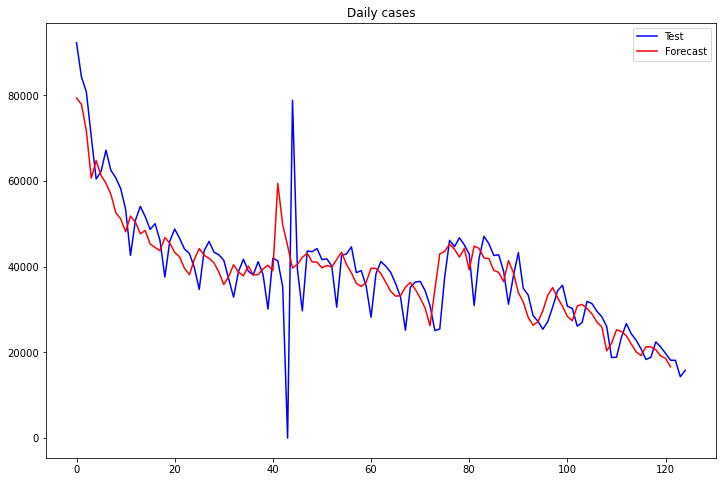

In [75]:
plot_fore_test(india_cases_test_scaled, yhat_uni_non_stacked_india_scaled, title='Daily cases')

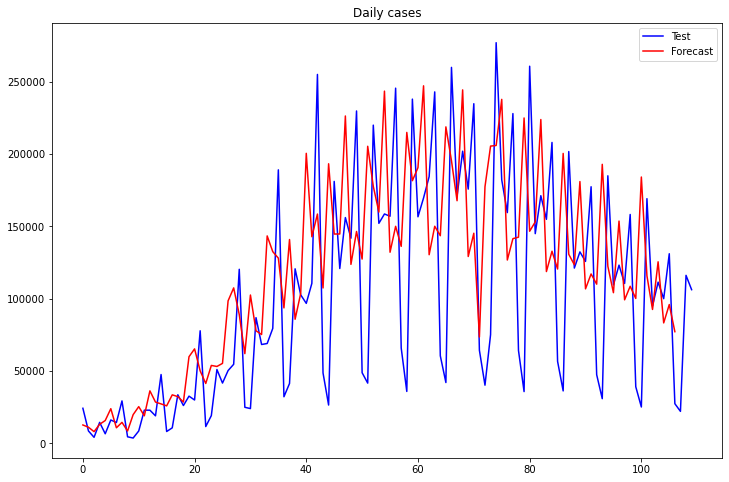

In [76]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_non_stacked_usa_scaled, title='Daily cases')

### Univariate Non Stacked -- Long-Term

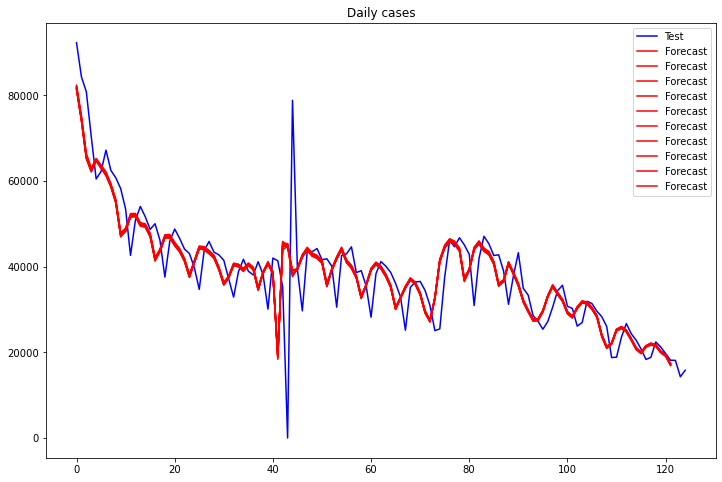

In [77]:
plot_fore_test(india_cases_test_scaled, yhat_uni_non_stacked_long_india_scaled, title='Daily cases')

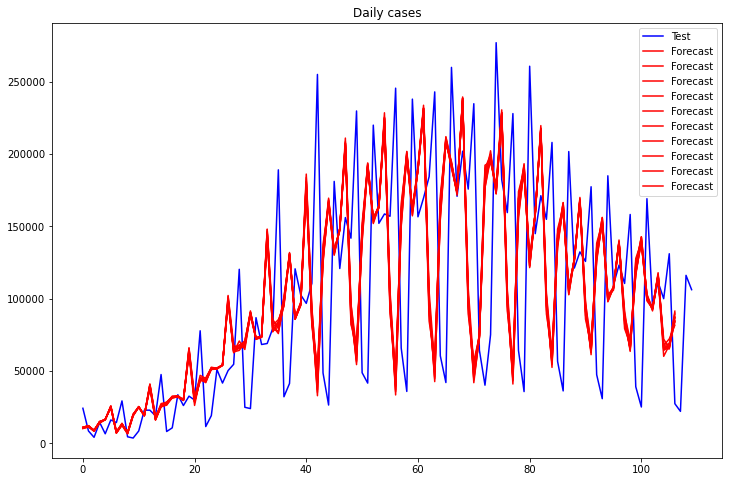

In [78]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_non_stacked_long_usa_scaled, title='Daily cases')

### Univariate Stacked -- Rolling

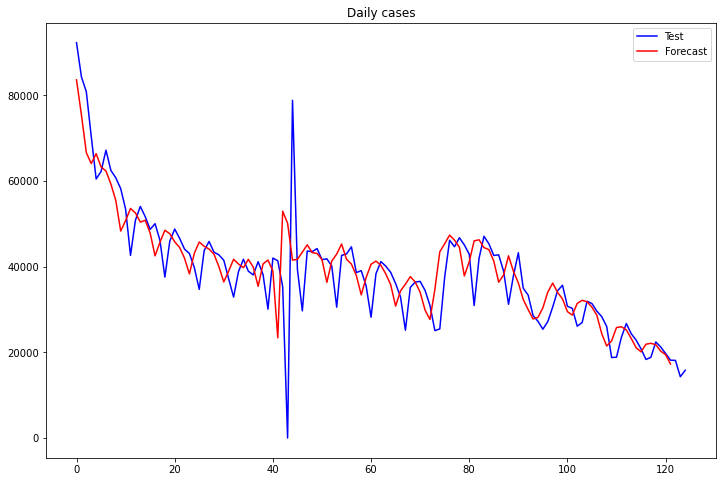

In [79]:
plot_fore_test(india_cases_test_scaled, yhat_uni_stacked_india_scaled, title='Daily cases')

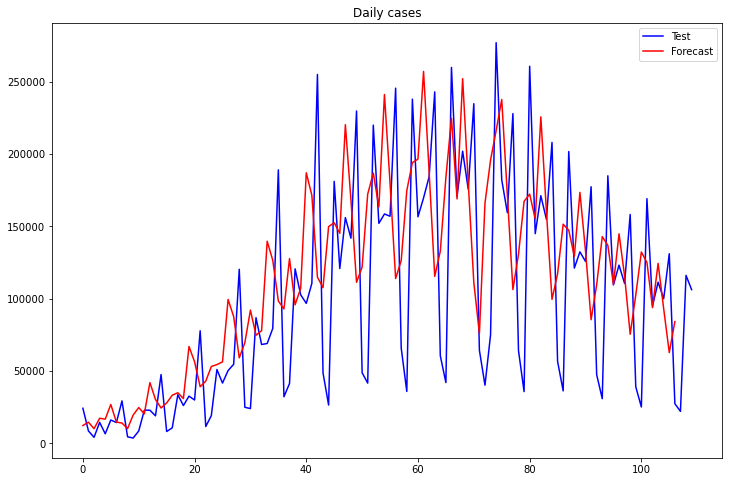

In [80]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_stacked_usa_scaled, title='Daily cases')

### Univariate Stacked -- Long-Term

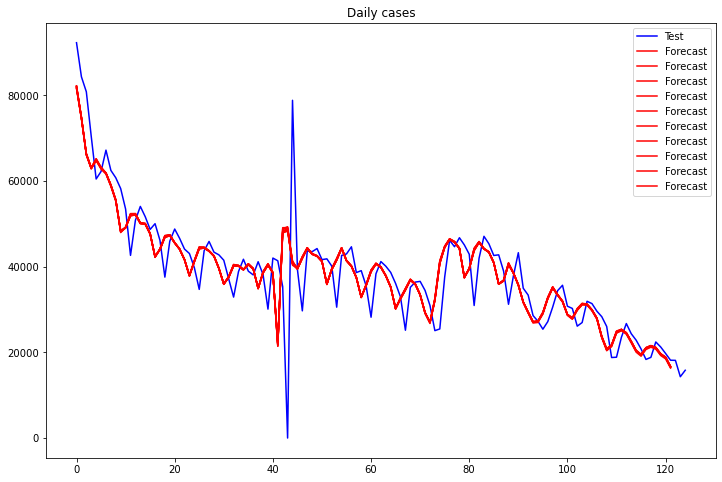

In [81]:
plot_fore_test(india_cases_test_scaled, yhat_uni_stacked_long_india_scaled, title='Daily cases')

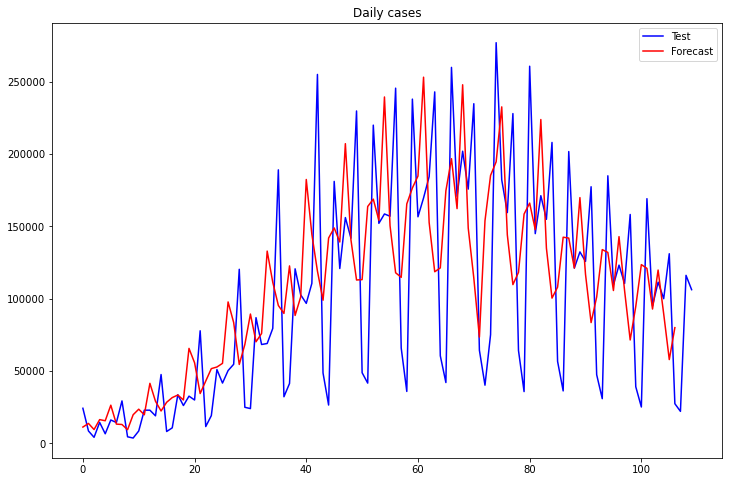

In [82]:
plot_fore_test(usa_cases_test_scaled, yhat_uni_stacked_long_usa_scaled, title='Daily cases')

#  Evaluation Metrics

In [83]:
keras_mape = MeanAbsolutePercentageError()
keras_mape(india_cases_test_scaled[3:], yhat_uni_non_stacked_india_scaled).numpy()

320158830000.0

In [88]:
def MAPE(Y_actual,Y_Predicted, title):
    mask = Y_actual != 0
    
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual)[mask])*100
    print(f"MAPE of {title} is {mape}%")
    
mape_non_stacked_india = MAPE(india_cases_test_scaled[3:], yhat_uni_non_stacked_india_scaled, title="India Non-stacked")
mape_stacked_india = MAPE(india_cases_test_scaled[3:], yhat_uni_stacked_india_scaled, title="India Stacked")
# mape_vacc = MAPE(val['Confirmed'], roll_fc, title="Daily Cases")

MAPE of India Non-stacked is 11.166527048185534%
MAPE of India Stacked is 13.990175036186656%


<ipython-input-88-d299e03c4ecf>:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual)[mask])*100


In [89]:
mape_non_stacked_usa = MAPE(usa_cases_test_scaled[3:], yhat_uni_non_stacked_usa_scaled, title="USA Non-stacked")
mape_stacked_usa = MAPE(usa_cases_test_scaled[3:], yhat_uni_stacked_usa_scaled, title="USA Stacked")

MAPE of USA Non-stacked is 99.6579072844637%
MAPE of USA Stacked is 110.90439499798306%


In [91]:
from sklearn.metrics import mean_absolute_error

print('MAE of USA Non-stacked:', mean_absolute_error(usa_cases_test_scaled[3:], yhat_uni_non_stacked_usa_scaled))
print('MAE of USA Stacked:', mean_absolute_error(usa_cases_test_scaled[3:], yhat_uni_stacked_usa_scaled))

MAE of USA Non-stacked: 52745.337835864484
MAE of USA Stacked: 56715.02113755841


In [92]:
print('MAE of India Non-stacked:', mean_absolute_error(india_cases_test_scaled[3:], yhat_uni_non_stacked_india_scaled))
print('MAE of Inida stacked:', mean_absolute_error(india_cases_test_scaled[3:], yhat_uni_stacked_india_scaled))

MAE of India Non-stacked: 4172.5055391905735
MAE of Inida stacked: 5244.304303278688
